In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testtc/test.csv
/kaggle/input/traintc/train.csv


In [2]:
df=pd.read_csv('/kaggle/input/traintc/train.csv')
test_data = pd.read_csv('/kaggle/input/testtc/test.csv')
combined = pd.concat([df, test_data], sort=False)
df=combined

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)


In [5]:
cabin_by_class = df.groupby('Pclass')['HasCabin'].mean()
print(cabin_by_class)


Pclass
1    0.792570
2    0.083032
3    0.022567
Name: HasCabin, dtype: float64


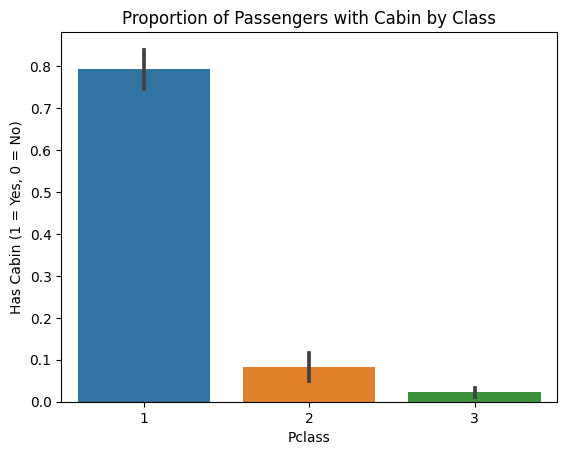

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Pclass', y='HasCabin', data=df)
plt.title("Proportion of Passengers with Cabin by Class")
plt.ylabel("Has Cabin (1 = Yes, 0 = No)")
plt.show()


In [7]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df['CabinClass'] = df['Pclass'] * df['HasCabin']


In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the passenger themself


In [9]:
survival_by_family = df.groupby('FamilySize')['Survived'].mean()
print(survival_by_family)


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


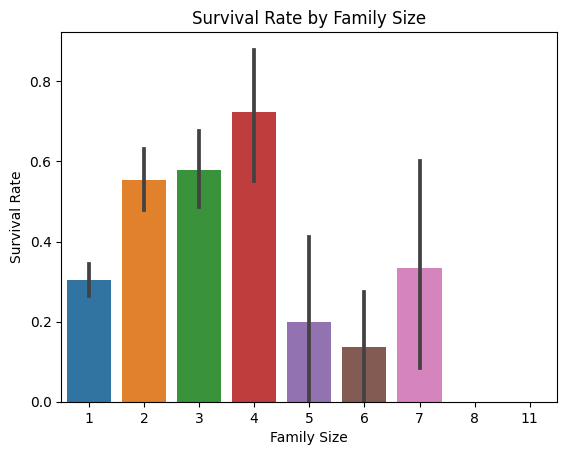

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.show()


In [11]:
def family_group(size):
    if size == 1:
        return 'Solo'
    elif size <= 4:
        return 'Small'
    elif size <= 6:
        return 'Medium'
    else:
        return 'Large'

df['FamilyGroup'] = df['FamilySize'].apply(family_group)


In [12]:
df.groupby('Pclass')['Fare'].mean()


Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare Distribution by Passenger Class')

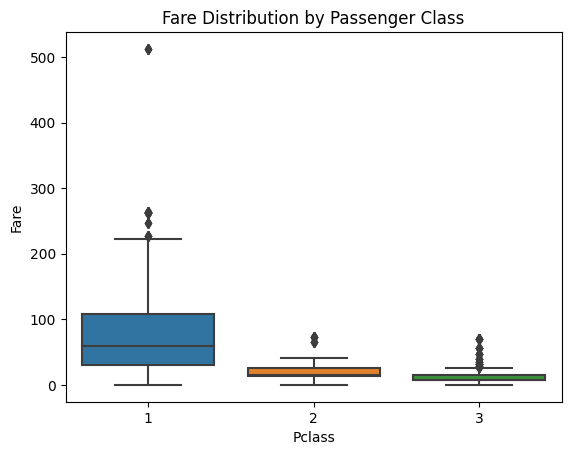

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")


In [14]:
df['Fare_log'] = df['Fare'].apply(lambda x: np.log1p(x))  # log1p handles 0 safely

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


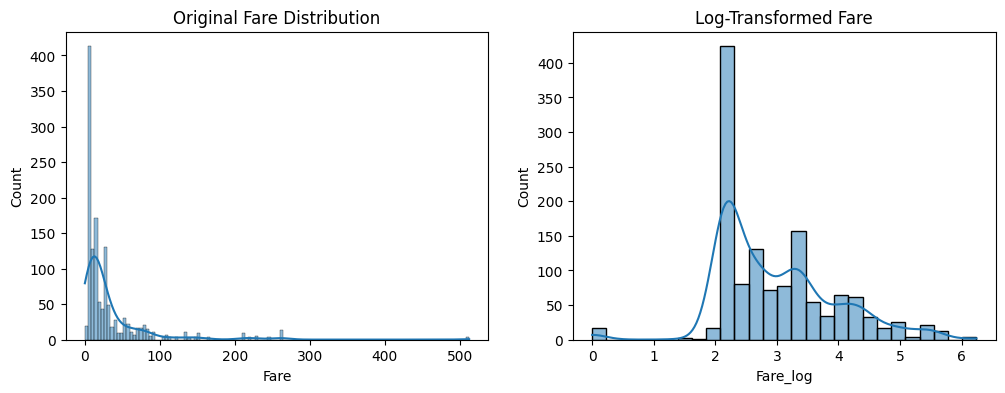

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Fare'], kde=True, ax=ax[0])
ax[0].set_title("Original Fare Distribution")

sns.histplot(df['Fare_log'], kde=True, ax=ax[1])
ax[1].set_title("Log-Transformed Fare")
plt.show()


In [16]:
# 1. Impute missing Age using median by Sex and Pclass
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# 2. Impute missing Embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 3. Extract Deck from Cabin and impute 'U' (Unknown) for missing cabins
df['Deck'] = df['Cabin'].str[0]
df['Deck'].fillna('U', inplace=True)

/tmp/ipykernel_13/1198387443.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_13/1198387443.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [17]:
df.isnull().sum().sort_values(ascending=False).head(15)

Cabin          1014
Survived        418
Fare              1
Fare_log          1
FamilyGroup       0
FamilySize        0
CabinClass        0
HasCabin          0
Embarked          0
PassengerId       0
Ticket            0
Parch             0
SibSp             0
Age               0
Sex               0
dtype: int64

In [18]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'HasCabin',
       'CabinClass', 'FamilySize', 'FamilyGroup', 'Fare_log', 'Deck'],
      dtype='object')


In [19]:
df.drop(columns=['Cabin'], inplace=True)


In [20]:
df.isnull().sum().sort_values(ascending=False).head(15)

Survived       418
Fare             1
Fare_log         1
PassengerId      0
FamilyGroup      0
FamilySize       0
CabinClass       0
HasCabin         0
Embarked         0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
dtype: int64

In [21]:
# Fill missing Fare based on median Fare within each Pclass
df['Fare'] = df.groupby('Pclass')['Fare'].transform(
    lambda x: x.fillna(x.median())
)
df['Fare_log'] = df['Fare'].apply(lambda x: np.log(x + 1))


In [22]:
print(df.select_dtypes(include='object').columns)  # Should be empty
print(df.isnull().sum().sum()) 

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'FamilyGroup', 'Deck'], dtype='object')
418


In [23]:
df.groupby('Embarked')['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [24]:
df.groupby('Sex')['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [25]:
# Group by Sex, Age (you might want to bin age first), and Survived
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

grouped = df.groupby(['Sex', 'AgeBin', 'Survived'])['PassengerId'].count().reset_index()
grouped.rename(columns={'PassengerId': 'Count'}, inplace=True)
print(grouped)


       Sex      AgeBin  Survived  Count
0   female       Child       0.0     13
1   female       Child       1.0     19
2   female        Teen       0.0      9
3   female        Teen       1.0     27
4   female  YoungAdult       0.0     43
5   female  YoungAdult       1.0    121
6   female       Adult       0.0     16
7   female       Adult       1.0     63
8   female      Senior       0.0      0
9   female      Senior       1.0      3
10    male       Child       0.0     16
11    male       Child       1.0     21
12    male        Teen       0.0     31
13    male        Teen       1.0      3
14    male  YoungAdult       0.0    287
15    male  YoungAdult       1.0     54
16    male       Adult       0.0    117
17    male       Adult       1.0     29
18    male      Senior       0.0     17
19    male      Senior       1.0      2


/tmp/ipykernel_13/415350966.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Sex', 'AgeBin', 'Survived'])['PassengerId'].count().reset_index()


In [26]:
survival_rate = df.groupby(['Sex', 'AgeBin'])['Survived'].mean().reset_index()
print(survival_rate)


      Sex      AgeBin  Survived
0  female       Child  0.593750
1  female        Teen  0.750000
2  female  YoungAdult  0.737805
3  female       Adult  0.797468
4  female      Senior  1.000000
5    male       Child  0.567568
6    male        Teen  0.088235
7    male  YoungAdult  0.158358
8    male       Adult  0.198630
9    male      Senior  0.105263


/tmp/ipykernel_13/2632816335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby(['Sex', 'AgeBin'])['Survived'].mean().reset_index()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


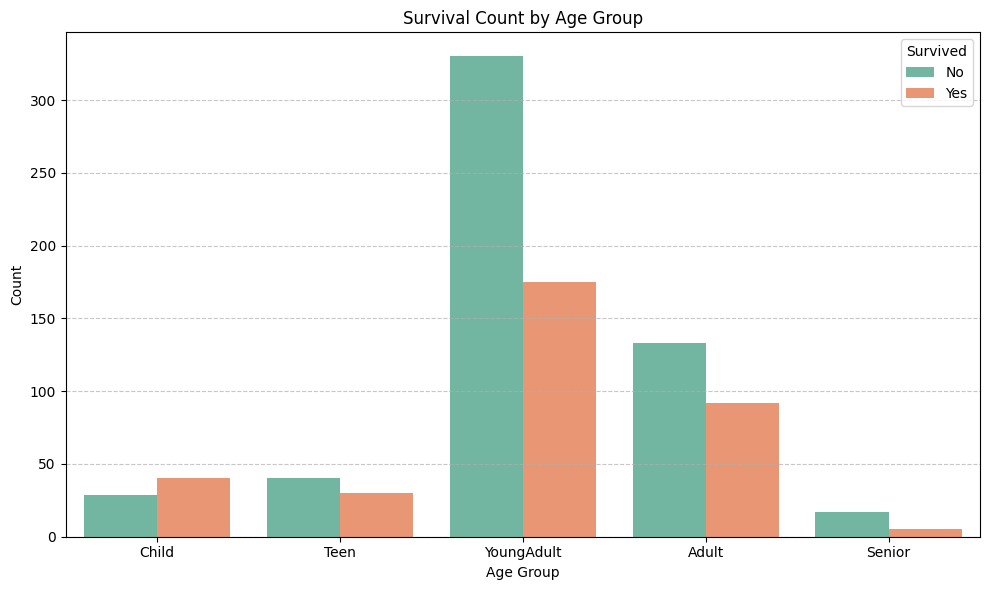

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, bin ages for grouping
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Create a countplot of survival by gender and age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeBin', hue='Survived', palette='Set2', dodge=True)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

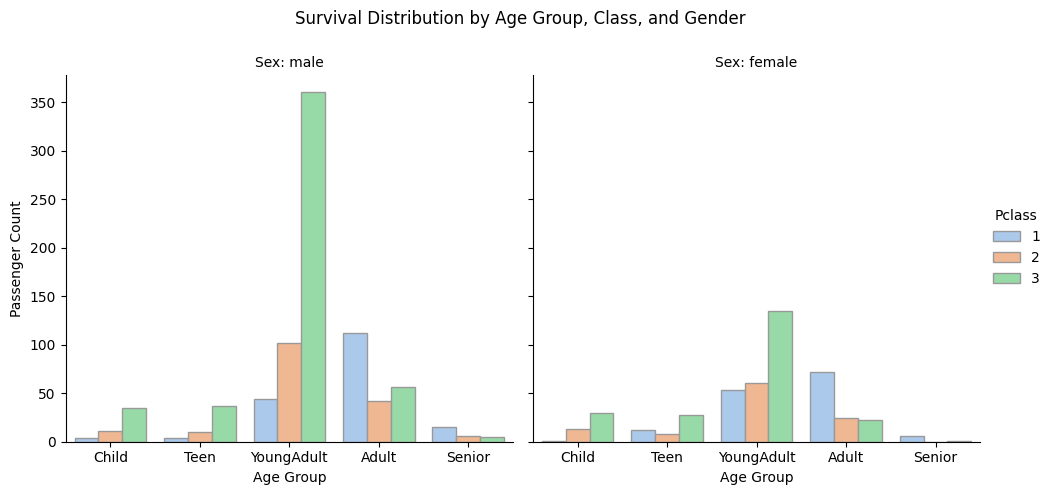

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure AgeBin exists
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], 
                      labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Set up the grid
g = sns.catplot(
    data=df, kind="count", 
    x="AgeBin", hue="Pclass", col="Sex",
    palette="pastel", edgecolor=".6"
)

g.set_titles("Sex: {col_name}")
g.set_axis_labels("Age Group", "Passenger Count")
g._legend.set_title("Pclass")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Survival Distribution by Age Group, Class, and Gender")
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=0, female=1 (or vice versa)

# 2. Extract title from 'Name' and drop 'Name'
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.')
df.drop(columns=['Name'], inplace=True)

# Optional: consolidate rare titles here if not already done
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Lady', 'Countess', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# 3. Drop or engineer 'Ticket'
df.drop(columns=['Ticket'], inplace=True)

# 4. One-hot encode selected categorical variables
df = pd.get_dummies(df, columns=['Embarked', 'FamilyGroup', 'Deck', 'Title','AgeBin'], drop_first=True)


In [30]:
# Check data types first
print(df.dtypes[df.dtypes == 'object'])


Series([], dtype: object)


In [31]:
# Final check before modeling
print(df.isnull().sum())  # make sure no new NaNs were created
print(df.dtypes)          # ensure everything is numeric


PassengerId             0
Survived              418
Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
HasCabin                0
CabinClass              0
FamilySize              0
Fare_log                0
Embarked_Q              0
Embarked_S              0
FamilyGroup_Medium      0
FamilyGroup_Small       0
FamilyGroup_Solo        0
Deck_B                  0
Deck_C                  0
Deck_D                  0
Deck_E                  0
Deck_F                  0
Deck_G                  0
Deck_T                  0
Deck_U                  0
Title_Miss              0
Title_Mlle              0
Title_Mme               0
Title_Mr                0
Title_Mrs               0
Title_Ms                0
Title_Rare              0
Title_the Countess      0
AgeBin_Teen             0
AgeBin_YoungAdult       0
AgeBin_Adult            0
AgeBin_Senior           0
dtype: int64
PassengerId             i

In [32]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'HasCabin', 'CabinClass', 'FamilySize', 'Fare_log',
       'Embarked_Q', 'Embarked_S', 'FamilyGroup_Medium', 'FamilyGroup_Small',
       'FamilyGroup_Solo', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_T', 'Deck_U', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rare', 'Title_the Countess',
       'AgeBin_Teen', 'AgeBin_YoungAdult', 'AgeBin_Adult', 'AgeBin_Senior'],
      dtype='object')


In [33]:
print(df.select_dtypes(include='object').columns)  # Should be empty
print(df.isnull().sum().sum()) 

Index([], dtype='object')
418


In [34]:
# 🔹 1. Get original train length
train_len = len(pd.read_csv('/kaggle/input/traintc/train.csv'))

# 🔹 2. Define X and y (use only the training portion)
X = df.drop(columns=['Survived','PassengerId'], errors='ignore').iloc[:train_len]
y = df.loc[:train_len-1, 'Survived']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [36]:
X_train.columns = X_train.columns.str.replace(' ', '_')


In [37]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    n_estimators=100,
    num_leaves=64,
    min_child_samples=1,
    min_split_gain=0,
    max_depth=-1,
    random_state=42
)

model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028


LGBMClassifier(min_child_samples=1, min_split_gain=0, num_leaves=64,
               random_state=42)

In [38]:
y_train.value_counts(normalize=True)


Survived
0.0    0.616573
1.0    0.383427
Name: proportion, dtype: float64

In [39]:
X_train.columns = X_train.columns.str.replace(' ', '_')
X_valid.columns = X_valid.columns.str.replace(' ', '_')


In [40]:
df.columns = df.columns.str.replace(' ', '_')


In [41]:
assert list(X_train.columns) == list(X_valid.columns)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

# Define your chosen models
subset_models = {
    'Logistic': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate
subset_results = {}

for name, model in subset_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    probs = model.predict_proba(X_valid)[:, 1]
    
    acc = accuracy_score(y_valid, preds)
    auc = roc_auc_score(y_valid, probs)
    
    subset_results[name] = {'Accuracy': round(acc, 4), 'ROC_AUC': round(auc, 4)}

# Display
pd.DataFrame(subset_results).T.sort_values('ROC_AUC', ascending=False)


,Accuracy,ROC_AUC
Logistic,0.8436,0.8599
XGBoost,0.8268,0.8363
RandomForest,0.8045,0.8319


In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

def evaluate_models(models, X_train, X_valid, y_train, y_valid):
    """
    Evaluates classification models with accuracy and ROC AUC.
    Handles regressors like BayesianRidge by thresholding at 0.5.
    """
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_valid)[:, 1]
        else:
            probs = model.predict(X_valid)
        
        # Threshold for BayesianRidge, if needed
        preds = (probs >= 0.5).astype(int) if 'Ridge' in name or 'Bayesian' in name else model.predict(X_valid)
        
        acc = accuracy_score(y_valid, preds)
        auc = roc_auc_score(y_valid, probs)
        
        results[name] = {'Accuracy': round(acc, 4), 'ROC_AUC': round(auc, 4)}
    
    return pd.DataFrame(results).T.sort_values('ROC_AUC', ascending=False)


In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

RANDOM_STATE = 42

# Logistic with Scaling
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000, random_state=RANDOM_STATE))
])

# Base models
base_models = [
    ('lr', logreg_pipeline),
    ('rf', RandomForestClassifier(random_state=RANDOM_STATE)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE))
]

# Meta-model (final estimator)
final_estimator = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)

# Build StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=final_estimator,
    passthrough=True,  # Optional: pass original features to final estimator
    cv=5,
    n_jobs=-1
)

# Fit on training data
stacking_model.fit(X_train, y_train)

# Evaluate
preds = stacking_model.predict(X_valid)
probs = stacking_model.predict_proba(X_valid)[:, 1]

acc = accuracy_score(y_valid, preds)
auc = roc_auc_score(y_valid, probs)

print(f"📊 Stacking Model Results:")
print(f"Accuracy: {round(acc, 4)}")
print(f"ROC AUC : {round(auc, 4)}")


📊 Stacking Model Results:
Accuracy: 0.8547
ROC AUC : 0.8663


In [45]:
# All features except Survived and PassengerId
X_full = df.drop(columns=['Survived', 'PassengerId'], errors='ignore').iloc[:train_len]
y_full = df.loc[:train_len-1, 'Survived']

# Test set
X_test = df.drop(columns=['Survived', 'PassengerId'], errors='ignore').iloc[train_len:]


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)      # for training
X_test_scaled = scaler.transform(X_test)     # for prediction


In [47]:
from sklearn.linear_model import LogisticRegressionCV

elastic_model = LogisticRegressionCV(
    cv=5,
    l1_ratios=[0.1, 0.5, 0.9],
    max_iter=5000,
    penalty='elasticnet',
    solver='saga',
    random_state=42,
    scoring='roc_auc'
)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [51]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, roc_auc_score

models = {
    "L1 (Lasso)": LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000),
    "L2 (Ridge)": LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000),
    "ElasticNet (L1+L2)": LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        l1_ratios=[0.1, 0.5, 0.9],
        Cs=10,
        cv=5,
        scoring='roc_auc',
        max_iter=5000,
        random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_preds = model.predict(X_val_scaled)
    val_probs = model.predict_proba(X_val_scaled)[:, 1]
    
    acc = accuracy_score(y_val, val_preds)
    auc = roc_auc_score(y_val, val_probs)
    
    results[name] = {'Accuracy': round(acc, 4), 'ROC_AUC': round(auc, 4)}

# Show comparison
import pandas as pd
pd.DataFrame(results).T.sort_values('ROC_AUC', ascending=False)


,Accuracy,ROC_AUC
L1 (Lasso),0.8268,0.8627
L2 (Ridge),0.8324,0.8625
ElasticNet (L1+L2),0.8101,0.8523


In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_val_scaled)
xgb_probs = xgb_model.predict_proba(X_val_scaled)[:, 1]

print("XGBoost Accuracy:", round(accuracy_score(y_val, xgb_preds), 4))
print("XGBoost ROC AUC :", round(roc_auc_score(y_val, xgb_probs), 4))


XGBoost Accuracy: 0.8045
XGBoost ROC AUC : 0.8466


In [53]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    verbose=0,
    random_state=42
)

cat_model.fit(X_train, y_train)  # No scaling needed!
cat_preds = cat_model.predict(X_val)
cat_probs = cat_model.predict_proba(X_val)[:, 1]

print("CatBoost Accuracy:", round(accuracy_score(y_val, cat_preds), 4))
print("CatBoost ROC AUC :", round(roc_auc_score(y_val, cat_probs), 4))


CatBoost Accuracy: 0.8212
CatBoost ROC AUC : 0.8547


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2, stratify=y_full, random_state=42)

models = {
    "L1 (Lasso)": LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000),
    "L2 (Ridge)": LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000),
    "No Reg": LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:, 1]
    
    acc = accuracy_score(y_val, preds)
    auc = roc_auc_score(y_val, probs)
    
    print(f"{name} → Accuracy: {acc:.4f}, AUC: {auc:.4f}")


L1 (Lasso) → Accuracy: 0.8380, AUC: 0.8585
L2 (Ridge) → Accuracy: 0.8212, AUC: 0.8584


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


No Reg → Accuracy: 0.8324, AUC: 0.8626


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# Retrain model
stacking_model.fit(X_full, y_full)

# Predict and submit
test_preds = stacking_model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_preds
})

submission.to_csv('submission.csv', index=False)
print("✅ 'submission.csv' (using full features) is ready!")


✅ 'submission.csv' (using full features) is ready!


In [56]:
print(y_full.isnull().sum())  # should be 0


0


In [57]:
print(X_full.columns.equals(X_test.columns))  # should be True


True


In [58]:
# Sanity check
print(stacking_model.predict(X_full[:5]))  # should output [0, 1, ...]


[0. 1. 1. 1. 0.]


In [59]:
# Start from full df
X_all = df.drop(columns=['Survived', 'PassengerId'], errors='ignore')
X_full = X_all.iloc[:train_len]
X_test = X_all.iloc[train_len:]

# Optional: if you dropped features before, do it here
# X_full = X_full.drop(columns=features_to_drop, errors='ignore')
# X_test = X_test.drop(columns=features_to_drop, errors='ignore')

# Make sure columns match exactly
X_test = X_test[X_full.columns]


In [60]:
stacking_model.fit(X_full, y_full)
test_preds = stacking_model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_preds.astype(int)  # just to ensure it's int, not float
})

submission.to_csv('submission.csv', index=False)


In [61]:
print(submission.head())
print(submission.shape)  # should be (418, 2)
print(submission['Survived'].value_counts())  # check 0s and 1s


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
(418, 2)
Survived
0    266
1    152
Name: count, dtype: int64


In [62]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Method 1: ANOVA F-test (good for linear models)
selector = SelectKBest(score_func=f_classif, k='all')  # Start with all to inspect scores
selector.fit(X_train, y_train)

feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("📊 Feature Scores:\n", feature_scores)


📊 Feature Scores:
                Feature       Score
26            Title_Mr  317.016763
1                  Sex  306.593249
9             Fare_log  102.442025
22              Deck_U   99.462219
6             HasCabin   99.462219
0               Pclass   97.835853
27           Title_Mrs   97.430906
23          Title_Miss   84.265009
7           CabinClass   74.689720
13   FamilyGroup_Small   67.461461
5                 Fare   58.314907
14    FamilyGroup_Solo   34.601859
11          Embarked_S   23.546389
17              Deck_D   21.097573
15              Deck_B   19.149438
18              Deck_E   18.416236
16              Deck_C   16.851283
12  FamilyGroup_Medium    8.360211
32   AgeBin_YoungAdult    6.553140
19              Deck_F    5.615841
4                Parch    5.066904
24          Title_Mlle    3.230752
2                  Age    3.192070
34       AgeBin_Senior    2.660201
28            Title_Ms    1.609437
33        AgeBin_Adult    1.080503
10          Embarked_Q    0.705233
2

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [25 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [63]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

# 🔹 Step 1: Drop weak/noisy features
features_to_drop = [
    'Title_Rare', 'Title_Mme', 'Title_the_Countess',
    'Deck_G', 'Deck_T', 'Embarked_Q', 'AgeBin_Teen', 'AgeBin_Adult'
]

X_train_pruned = X_train.drop(columns=features_to_drop, errors='ignore')
X_valid_pruned = X_valid.drop(columns=features_to_drop, errors='ignore')

# 🔹 Step 2: Define base models with scaling for Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])

base_models = [
    ('lr', logreg_pipeline),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# 🔹 Step 3: Define final estimator and stack
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=2000, random_state=42),
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# 🔹 Step 4: Train the stacking model
stack_model.fit(X_train_pruned, y_train)

# 🔹 Step 5: Predict and evaluate
preds = stack_model.predict(X_valid_pruned)
probs = stack_model.predict_proba(X_valid_pruned)[:, 1]

print("🔍 Accuracy:", round(accuracy_score(y_valid, preds), 4))
print("🔍 ROC AUC :", round(roc_auc_score(y_valid, probs), 4))


🔍 Accuracy: 0.8492
🔍 ROC AUC : 0.8643


In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(stacking_model, X_scaled, y_full, cv=5, scoring='roc_auc')
print(f"Cross-Validated ROC AUC: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-Validated ROC AUC: 0.8677 ± 0.0309


In [65]:
from sklearn.metrics import classification_report

val_preds = stacking_model.predict(X_val_scaled)
print(classification_report(y_val, val_preds))


              precision    recall  f1-score   support

         0.0       1.00      0.08      0.15       110
         1.0       0.41      1.00      0.58        69

    accuracy                           0.44       179
   macro avg       0.70      0.54      0.36       179
weighted avg       0.77      0.44      0.32       179



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
from sklearn.metrics import f1_score

probs = stacking_model.predict_proba(X_val_scaled)[:, 1]

best_threshold = 0.5
best_f1 = 0

for thresh in [i/100 for i in range(30, 71)]:
    preds_thresh = (probs >= thresh).astype(int)
    f1 = f1_score(y_val, preds_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"🔧 Best F1: {best_f1:.4f} at threshold: {best_threshold}")


🔧 Best F1: 0.6175 at threshold: 0.7


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

best_thresholds = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in skf.split(X_scaled, y_full):
    X_tr, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_tr, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]

    model = stacking_model  # or best model
    model.fit(X_tr, y_tr)
    probs = model.predict_proba(X_val)[:, 1]

    best_f1 = 0
    best_thresh = 0.5
    for t in [i/100 for i in range(30, 71)]:
        preds = (probs >= t).astype(int)
        f1 = f1_score(y_val, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t
    best_thresholds.append(best_thresh)

print(f"📌 Average best threshold: {sum(best_thresholds)/len(best_thresholds):.4f}")


📌 Average best threshold: 0.4200


In [68]:
# ✅ Make sure you have a trained final_model and scaled test data: X_test_scaled

# Step 1: Get predicted probabilities
test_probs = stacking_model.predict_proba(X_test_scaled)[:, 1]

# Step 2: Generate submissions for both thresholds
for t in [0.42, 0.68]:
    preds = (test_probs >= t).astype(int)
    
    submission = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],
        'Survived': preds
    })
    
    filename = f'submission_threshold_{t:.2f}.csv'
    submission.to_csv(filename, index=False)
    print(f"✅ Saved: {filename}")


✅ Saved: submission_threshold_0.42.csv
✅ Saved: submission_threshold_0.68.csv


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized search
rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=30,  # number of models to try
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_search.fit(X_train_pruned, y_train)
best_rf = rf_search.best_estimator_

print("✅ Best Random Forest Params:", rf_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}


In [70]:
from xgboost import XGBClassifier

# Parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

xgb_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_search.fit(X_train_pruned, y_train)
best_xgb = xgb_search.best_estimator_

print("✅ Best XGBoost Params:", xgb_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000, random_state=42))
])

# Stacking
stack_model_tuned = StackingClassifier(
    estimators=[
        ('lr', logreg_pipeline),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(max_iter=2000, random_state=42),
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# Train on pruned features
stack_model_tuned.fit(X_train_pruned, y_train)

# Evaluate
preds = stack_model_tuned.predict(X_valid_pruned)
probs = stack_model_tuned.predict_proba(X_valid_pruned)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score
print("📊 Tuned Stacking Accuracy:", round(accuracy_score(y_valid, preds), 4))
print("📊 Tuned Stacking ROC AUC :", round(roc_auc_score(y_valid, probs), 4))


📊 Tuned Stacking Accuracy: 0.8268
📊 Tuned Stacking ROC AUC : 0.8552
